<a href="https://colab.research.google.com/github/sam2005-max/curn_prediction_test/blob/main/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loyoha haqida
Sizning kompaniyangiz obunaga asoslangan xizmatni taqdim etadi va sodiq mijozlar bazasini saqlab qolish uning biznes modeli uchun juda muhimdir. So'nggi paytlarda obunani bekor qilgan mijozlar sonining ko'payishi kuzatildi. Kompaniya proaktiv saqlash strategiyalarini xabardor qilish uchun mijozlarning ishlamay qolishini oldindan bashorat qilish uchun ma'lumotlar fanidan va mashinani o'rganishdan foydalanmoqchi.

# Kerakli kutubhonalarni chqqirib olamiz

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate
import plotly.express as px


# Mijozlarning ma'lumotlarini yuklab olamiz

# Ma'lumotlar haqida

Gender: Customer's gender (male/female)

Age: Customer's age

Tenure: Number of months the customer has been with the service

ServiceTier: Classification of the service level (basic, standard, premium)

MonthlyCharge: The amount charged to the customer each month

TotalCharges: The total amount charged to the customer so far

NumSupportTickets: Number of support tickets raised by the customer

NumDeviceTypes: Number of different types of devices registered to the customer's account

SatisfactionScore: Customer satisfaction score from recent surveys (1-5 scale)

Churn: Whether the customer has churned (True/False) - this is the target variable


In [61]:
data = pd.read_csv('/content/fake_customer_data.csv')
data

,CustomerID,Gender,Age,Tenure,ServiceTier,MonthlyCharge,TotalCharges,NumSupportTickets,NumDeviceTypes,SatisfactionScore,Churn
0,1,male,34,11,premium,72.496236,797.458595,3,3,4,True
1,2,female,26,56,standard,40.575330,2272.218472,4,2,3,True
2,3,male,50,67,standard,43.550379,2917.875362,2,3,2,False
3,4,male,37,29,standard,51.594724,1496.247005,4,2,2,True
4,5,male,30,9,premium,86.249596,776.246362,1,2,1,False
...,...,...,...,...,...,...,...,...,...,...,...
995,996,male,42,30,standard,33.478592,1004.357745,4,2,5,False
996,997,male,26,24,basic,12.958134,310.995207,4,4,1,True
997,998,female,21,30,standard,22.681123,680.433695,4,2,2,True
998,999,female,31,7,standard,55.828767,390.801369,7,4,4,False


# Shape

Bu yerda biz ma'lumotlarimizning hajmini ya'ni ustunlar va qatorlar sonini bilib olishimiz mumkin.

In [62]:
def shape_of_data(data):
  print(data.shape)
shape_of_data(data)

(1000, 11)


# Info

Bu yerda ma'lumotlarning turlarini ya'ni qaysi ustunda qanday ma'lumotlar turlari borligini ko'rishimiz mumkin

In [63]:
def data_info(data):
  data.info()
data_info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         1000 non-null   int64  
 1   Gender             1000 non-null   object 
 2   Age                1000 non-null   int64  
 3   Tenure             1000 non-null   int64  
 4   ServiceTier        1000 non-null   object 
 5   MonthlyCharge      1000 non-null   float64
 6   TotalCharges       1000 non-null   float64
 7   NumSupportTickets  1000 non-null   int64  
 8   NumDeviceTypes     1000 non-null   int64  
 9   SatisfactionScore  1000 non-null   int64  
 10  Churn              1000 non-null   bool   
dtypes: bool(1), float64(2), int64(6), object(2)
memory usage: 79.2+ KB


# Deacription data

Bu yerda ma'lumotlarni dascribe funksiyasi yordamida ma'lumotlarimizni statistikal ma'lumotlarini ko'rishimiz mumkin

In [64]:
def description_of_data(data):
  print(data.describe())
description_of_data(data)

        CustomerID          Age       Tenure  MonthlyCharge  TotalCharges  \
count  1000.000000  1000.000000  1000.000000    1000.000000   1000.000000   
mean    500.500000    43.799000    34.569000      44.687210   1485.276444   
std     288.819436    15.133857    20.348103      28.708885   1350.265848   
min       1.000000    18.000000     1.000000      10.039293     12.794424   
25%     250.750000    31.000000    17.000000      17.605445    471.333446   
50%     500.500000    44.000000    33.500000      38.527190    983.088963   
75%     750.250000    57.000000    52.000000      70.632094   2187.079806   
max    1000.000000    69.000000    71.000000      99.950001   6863.881851   

       NumSupportTickets  NumDeviceTypes  SatisfactionScore  
count         1000.00000     1000.000000        1000.000000  
mean             4.92700        2.532000           3.047000  
std              2.09668        1.130599           1.417321  
min              0.00000        1.000000           1.00000

# NUll Values

Bu yerda biz ma'lumotlarimizning ichidagi yo'q qiymatlar nechtaligini ko'rishimiz mumkin. Vaholangki ma'lumotlarimizning ichida null yani yo'q qiymatlar mavjud emas

In [65]:
def null_values(data):
  print(data.isnull().sum())
null_values(data)

CustomerID           0
Gender               0
Age                  0
Tenure               0
ServiceTier          0
MonthlyCharge        0
TotalCharges         0
NumSupportTickets    0
NumDeviceTypes       0
SatisfactionScore    0
Churn                0
dtype: int64


# Visualization

Mijozlarning ma'lumotlaridan foydalangan holda, ma'lumotlarimizdagi "Churn" ustuniga 3 ta ustundagi ma'lumotlarning nisbatini visualizatsiya ko'rinishida chiqarganmiz ushbu ustunlar: 'Gender', 'ServiceTier', 'NumDeviceTypes'

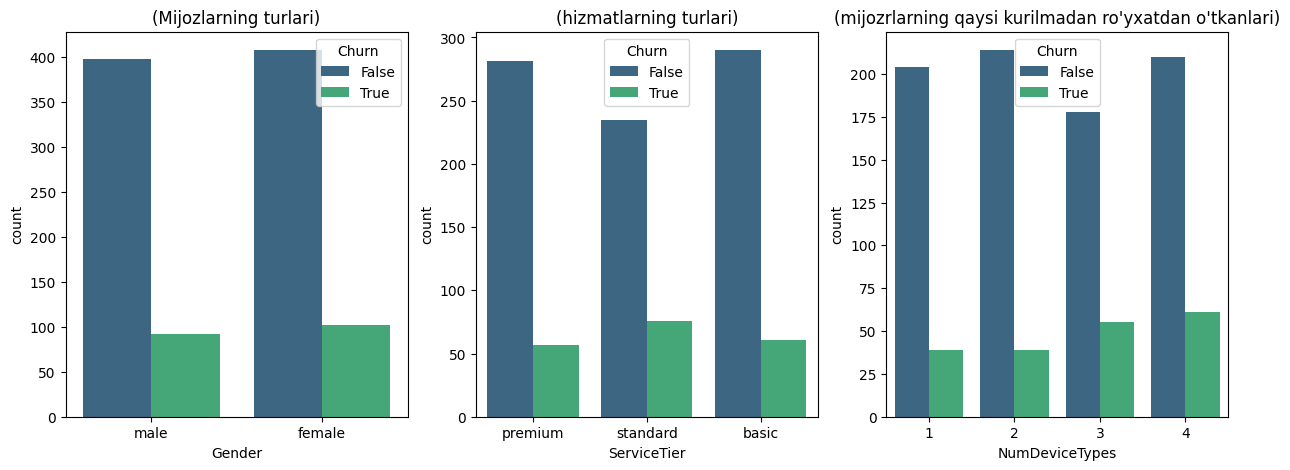

In [66]:
fig, axes = plt. subplots (1,3, figsize=(15,5))
sns.countplot(x='Gender', hue='Churn', palette='viridis', data=data, ax=axes [0])
axes [0] .set_title("(Mijozlarning turlari)")
sns.countplot(x='ServiceTier', hue='Churn', palette='viridis', data=data, ax=axes [1])
axes [1]. set_title("(hizmatlarning turlari)")
sns.countplot(x='NumDeviceTypes', hue='Churn', palette='viridis', data=data, ax=axes [2])
axes[2]. set_title("(mijozrlarning qaysi kurilmadan ro'yxatdan o'tkanlari)")
plt. show()

# Vusualizatsiyalar

1. (Mijozlarning turlari) Gender ustunini Churn ustuniga nisbatini olganmiz va bu yerda Ayol va Erkak o'rtasida obunani bekor qilganlar soni deyarli bir hil shuning uchun ushbu ustun bizning bashorat qilishimida katta ahamiyatga ega bo'lmaydi.

2. (Hizmat turlari) ServiceTier usnunini Churn ustuniga solishtirganimizni ko'rishingiz mumkin, Hizmat turlari: Premium, Standart, va Basic turlarga bo'lingan bu yerda ahamiyat beriladigan jihat Standar hizmat turida boshqa hizmat turlariga qaraganda obunani bekor qilish ko'p uchragan va bu holat ya'ni "ServiceTier" ustuni bashoratimizga ijobiy tasir qilishi mumkin

3. (Mijozlarning qaysi qurilmadan ro'yxatdan o'tganlari) NumDeviceType ustunini Churn ustuniga nisbatini ko'rishimiz mumkin. Qurilmalar to'rt turga 1-4 gacha raqamlar bilan belgilangan. Bu yerda ahamiyatli jihati 3 va 4 chi qurilmalatdan ro'yxatdan o'tganlar boshqalariga qaraganda ko'proq obunani bekor qilgan. Ushbu ustunham bashorat uchun kerakli ustun hisoblanadi.

# Visualizatsiya

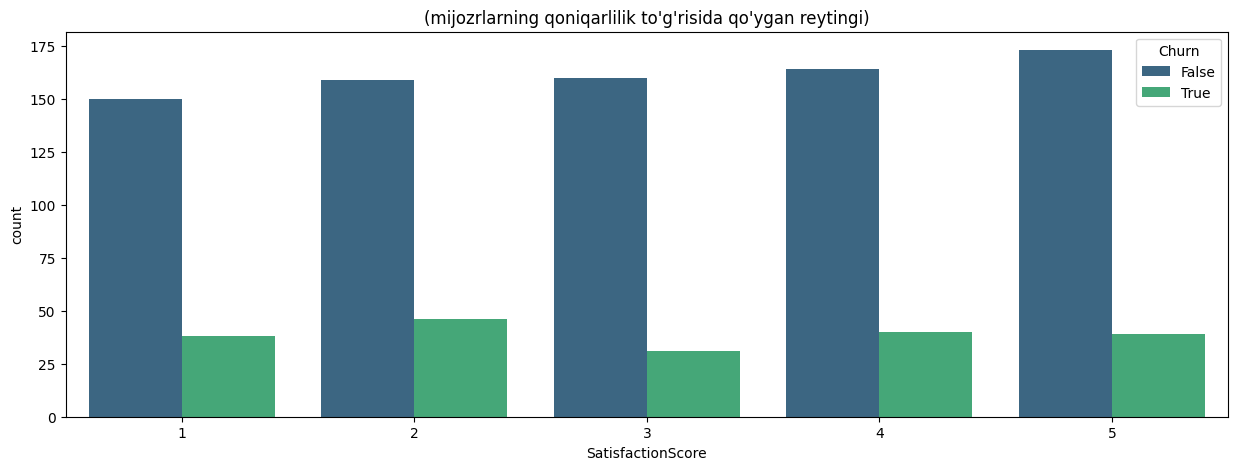

In [67]:
fig, axes = plt. subplots (figsize=(15,5))
sns.countplot(x='SatisfactionScore', hue='Churn', palette='viridis', data=data, ax=axes)
axes .set_title("(mijozrlarning qoniqarlilik to'g'risida qo'ygan reytingi)")
plt.show()

1. (Mijozlarning qoniqarlilik to'g'risida qo'ygan reytingi) SatisfctionScore ustunini Churn ustuniga nisbatini ko'rishimiz mumkin. Bu yerda qoniqarlilik baholari 1-5 gacha baholash tizimida baholangan va bu yerda ahamiyatlisi 2 reyting qo'ygan shahslar boshqa qo'yilgan reyting baholariga qaraganda ko'proq obunani bekor qilishgan. Ushbu ustunham bashoratimiz uchun kerak bo'lishi mumkin

# Visualizatsiya

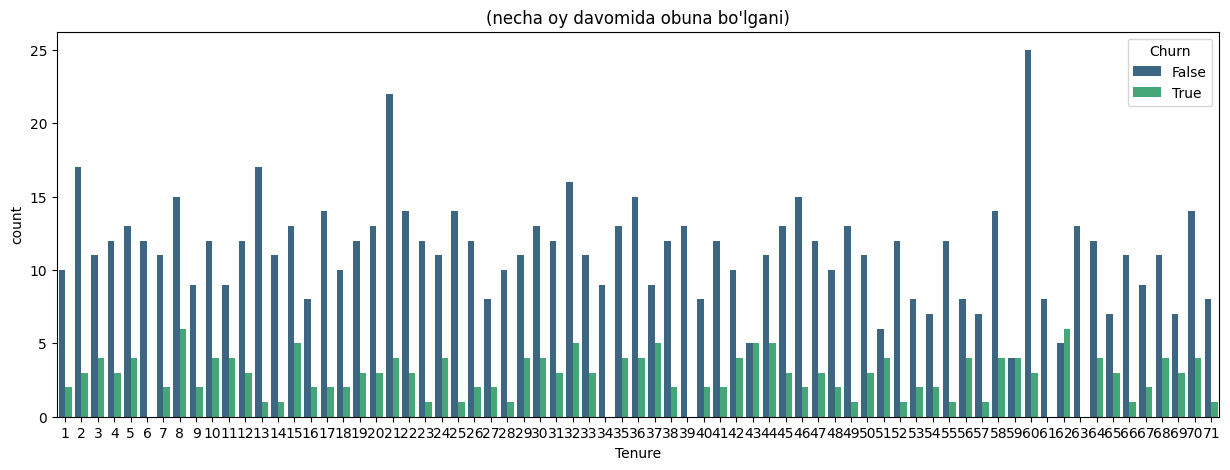

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots (figsize=(15,5))
sns.countplot(x='Tenure', hue='Churn', palette='viridis', data=data, ax=axes)
axes.set_title("(necha oy davomida obuna bo'lgani)")
plt.show()

1. (necha oy davomida obuna bo'lgani) biz Tenure ustunining Churn ustuniga nisbatini visual tarzda chiqardik. Bu yerda ko'rishimiz mumkin deyarli barcha ma'lumotlar bir hil yani necha oy davomida obunaqa qolgani raqamlarda bir hil lekin orasida bazi bir obunachilarning oylik obunaqa qolgani ko'proq chiqgan va bu ham modelimiz bashorati uchun ahamiyatli bo'lishi mumkin.

# Replace item

**Bu yerda biz Churn ustunidagi True va Folse qiymatlarni ML modelimiz yaxshi ishlachi uchun 0 va bir qaiymatlarga o'girib chiqganmmiz**

In [69]:
def boolean_to_int_Curn_col(data):
  data['Churn'] = data['Churn'].replace({True: 1, False: 0})
boolean_to_int_Curn_col(data)

In [70]:
data = data.drop(['CustomerID'], axis = 1)
data.Churn.value_counts()

0    806
1    194
Name: Churn, dtype: int64

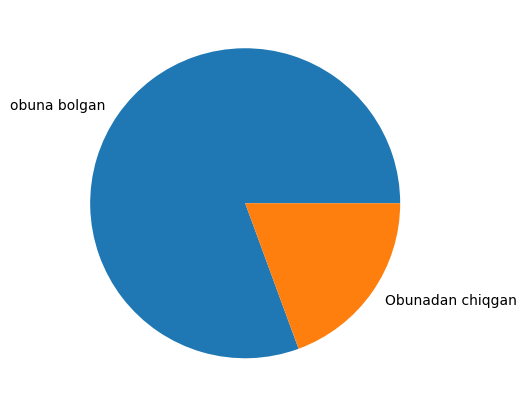

In [71]:
churn_status = data['Churn'].value_counts()/len(data)*100
plt.figure(figsize = (5,8))
plt.pie(churn_status, labels = ['obuna bolgan','Obunadan chiqgan'])
plt.show()

In [72]:
data.head()


,Gender,Age,Tenure,ServiceTier,MonthlyCharge,TotalCharges,NumSupportTickets,NumDeviceTypes,SatisfactionScore,Churn
0,male,34,11,premium,72.496236,797.458595,3,3,4,1
1,female,26,56,standard,40.575330,2272.218472,4,2,3,1
2,male,50,67,standard,43.550379,2917.875362,2,3,2,0
3,male,37,29,standard,51.594724,1496.247005,4,2,2,1
4,male,30,9,premium,86.249596,776.246362,1,2,1,0


In [73]:
print(data["Tenure"].min())
print(data["Tenure"].max())

1
71


In [74]:
# data.loc[ data['Tenure'] <= 10, 'Tenure'] = 0
# data.loc[(data['Tenure'] > 10) & (data['Tenure'] <= 20), 'Tenure'] = 1
# data.loc[(data['Tenure'] > 20) & (data['Tenure'] <= 30), 'Tenure'] = 2
# data.loc[(data['Tenure'] > 30) & (data['Tenure'] <= 40), 'Tenure'] = 3
# data.loc[(data['Tenure'] > 40) & (data['Tenure'] <= 50), 'Tenure'] = 4
# data.loc[(data['Tenure'] > 50) & (data['Tenure'] <= 60), 'Tenure'] = 5
# data.loc[(data['Tenure'] > 60) & (data['Tenure'] <= 70), 'Tenure'] = 6
# data.loc[ data['Tenure'] > 70, 'Tenure'] = 7

In [75]:
# data.loc[ data['MonthlyCharge'] <= 10, 'MonthlyCharge'] = 0
# data.loc[(data['MonthlyCharge'] > 10) & (data['MonthlyCharge'] <= 20), 'MonthlyCharge'] = 1
# data.loc[(data['MonthlyCharge'] > 20) & (data['MonthlyCharge'] <= 30), 'MonthlyCharge'] = 2
# data.loc[(data['MonthlyCharge'] > 30) & (data['MonthlyCharge'] <= 40), 'MonthlyCharge'] = 3
# data.loc[(data['MonthlyCharge'] > 40) & (data['MonthlyCharge'] <= 50), 'MonthlyCharge'] = 4
# data.loc[(data['MonthlyCharge'] > 50) & (data['MonthlyCharge'] <= 60), 'MonthlyCharge'] = 5
# data.loc[(data['MonthlyCharge'] > 60) & (data['MonthlyCharge'] <= 70), 'MonthlyCharge'] = 6
# data.loc[(data['MonthlyCharge'] > 70) & (data['MonthlyCharge'] <= 80), 'MonthlyCharge'] = 7
# data.loc[(data['MonthlyCharge'] > 80) & (data['MonthlyCharge'] <= 90), 'MonthlyCharge'] = 8
# data.loc[ data['MonthlyCharge'] > 90, 'MonthlyCharge'] = 9

# Compute Correlation
Bu yerda biz ma'lumotlarimizdagi Chrun ustunini qolgan ustunlarga nisbatini ko'rishimiz mumkin. Bu yerda ahamiyatlisi ma'lumotlarimiz Chrun s=ustuniga unchalikham bog'liq emasligini ko'rishimiz mumkin.

In [76]:
# df1 = []
# df2 = []
# num1 = 0
# for i in data['Churn']:
#   if i == 1:
#     df1.append(data.iloc[num1])
#   num1 += 1

# num2 = 0
# ran = len(df1)
# for i in data['Churn']:
#   if i == 0:
#     df2.append(data.iloc[num2])
#   num2 += 1
#   if len(df2) >= ran+ran:
#     break
# df = []
# n = 0
# for i in df1:
#   df.append(df1[n])
#   df.append(df2[n])
#   n += 1
# df = pd.DataFrame(df)
# df["Churn"].value_counts()

In [77]:
df = data
df.corrwith(df['Churn']).abs().sort_values(ascending=False)

<ipython-input-77-7751edf8b3f7>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['Churn']).abs().sort_values(ascending=False)


Churn                1.000000
NumDeviceTypes       0.077861
SatisfactionScore    0.023418
Tenure               0.020220
NumSupportTickets    0.016699
MonthlyCharge        0.014882
TotalCharges         0.008288
Age                  0.002507
dtype: float64

#Splitting data

Biz bu yerda modelimiz predict qilish uchun ma'lumotlarni olamiz va ma'lumotlarni encoding qilamiz. Ma'lumotlarni olishda correlatsiya kam chiqganligi uchunham faqt=atgina kerakli ma'lumotlarni olamiz.

In [88]:
X = df.drop(['Churn'], axis=1)
X = df[['NumDeviceTypes', 'ServiceTier', 'SatisfactionScore', 'Tenure',]]
y = df['Churn']
X = pd.get_dummies(X)
# X = pd.get_dummies(X, columns = ['SatisfactionScore'])
X.head()

,NumDeviceTypes,SatisfactionScore,Tenure,ServiceTier_basic,ServiceTier_premium,ServiceTier_standard
0,3,4,11,0,1,0
1,2,3,56,0,0,1
2,3,2,67,0,0,1
3,2,2,29,0,0,1
4,2,1,9,0,1,0


# StandarScaler

bu yerda ma'lumotlarni bashorat qilish uchun test va train qisimlarga bo'lib oldik

In [89]:
X

,NumDeviceTypes,SatisfactionScore,Tenure,ServiceTier_basic,ServiceTier_premium,ServiceTier_standard
0,3,4,11,0,1,0
1,2,3,56,0,0,1
2,3,2,67,0,0,1
3,2,2,29,0,0,1
4,2,1,9,0,1,0
...,...,...,...,...,...,...
995,2,5,30,0,0,1
996,4,1,24,1,0,0
997,2,2,30,0,0,1
998,4,4,7,0,0,1


In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=3)

# LogisticRegression

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.81      1.00      0.89       161
           1       0.00      0.00      0.00        39

    accuracy                           0.81       200
   macro avg       0.40      0.50      0.45       200
weighted avg       0.65      0.81      0.72       200

Model aniqligi: 0.805


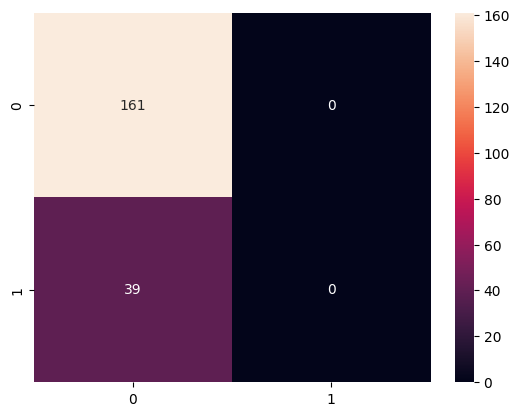

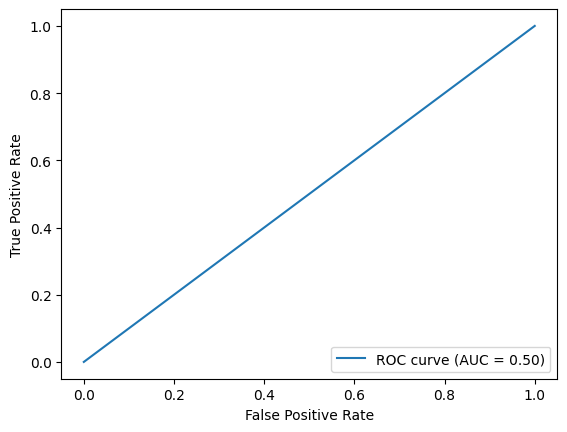

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn import metrics
# Modelni yaratamiz (training)
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = LR_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

**LogisticRegression**
Bu yerda ko'rishingiz mumkin ushbu modelimiz 81% aniqlikda ishlayapti lekin bashorat qilganda deyarli 39 da 1 yani bekor qiligan obunalarni aniqlay olmagan. Va yuqoridagi X va Y o'qlar bo'ylab joylashgan chiziqham ushbu model yaxshi ishlamayotganini anglitadi. A chiziq qanday holatda bo'lsa model yaxshi ishlayotgan bo'ladi deyilsa chiziq nuqtadan Y o'qi bo'ylab maximal ko'tariladi va X o'qi bo'ylab bir meyorda ketadi

# DecisionTreeClassifier

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       161
           1       0.29      0.31      0.30        39

    accuracy                           0.71       200
   macro avg       0.56      0.56      0.56       200
weighted avg       0.72      0.71      0.72       200

Model aniqligi:, 71%


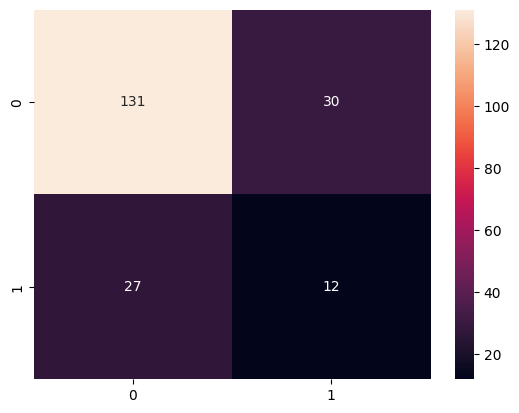

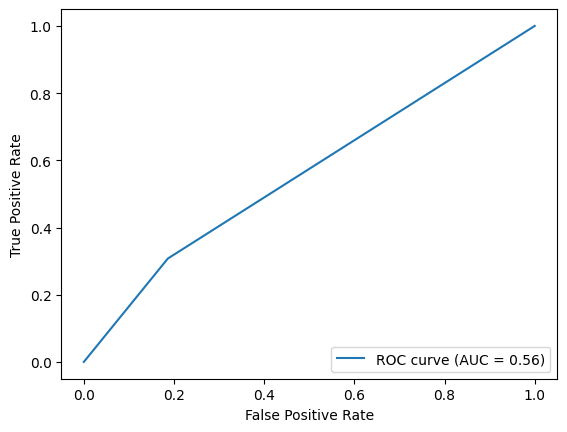

In [92]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Modelni yaratamiz (training)
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = tree_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"Model aniqligi:, {int(accuracy_score(y_test,y_pred)*100)}%")

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

DecisionTreeClassifier - ushbu modelimiz 73% aniqlikda bashoraat qilmoqda lekin bunda obunadan chiqganlarni 39 tadan 27 tasini hato bashorat qilmoqda va 161 ta obuna bo'lganlarni 23 tasi obuna bo'lmagan deya bashorat qilmoqda. Bu yerda ko'rishimiz mumkin bizni X va Y o'qi bo'ylab chizilgan ghafigimizda chiziq y o'qi bo'ylab ozgina ko'tarilgan bu esa model ozgina yaxshi ishlayotganini anglatadi.

# TensorFlow

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.81      1.00      0.89       161
           1       0.00      0.00      0.00        39

    accuracy                           0.81       200
   macro avg       0.40      0.50      0.45       200
weighted avg       0.65      0.81      0.72       200

Model aniqligi: 0.805


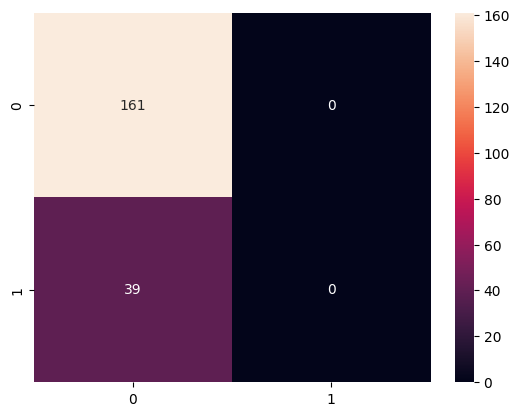

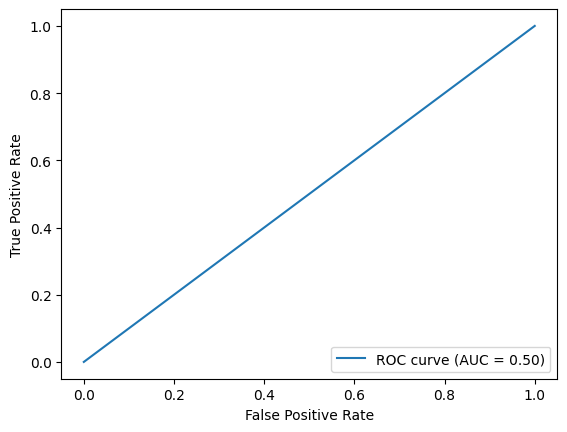

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn import metrics
# Modelni yaratamiz (training)
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = LR_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [94]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(6, input_shape=(6,), activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6252 - accuracy: 0.8062
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6093 - accuracy: 0.8062
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5898 - accuracy: 0.8062
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5680 - accuracy: 0.8062
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5487 - accuracy: 0.8062
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5349 - accuracy: 0.8062
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5250 - accuracy: 0.8062
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5174 - accuracy: 0.8062
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5119 - accuracy: 0.8062
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5075 - accuracy: 0.8062
Epoch 11/

In [95]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.4913 - accuracy: 0.8050


[0.4913276433944702, 0.8050000071525574]

In [96]:
yp = model.predict(X_test)
yp[:5]

7/7 [==============================] - 0s 2ms/step


array([[0.14860828],
       [0.12053045],
       [0.08593073],
       [0.27378547],
       [0.11698271]], dtype=float32)

# precision    recall  f1-score   support

In [97]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89       161
           1       0.00      0.00      0.00        39

    accuracy                           0.81       200
   macro avg       0.40      0.50      0.45       200
weighted avg       0.65      0.81      0.72       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(95.72222222222221, 0.5, 'Truth')

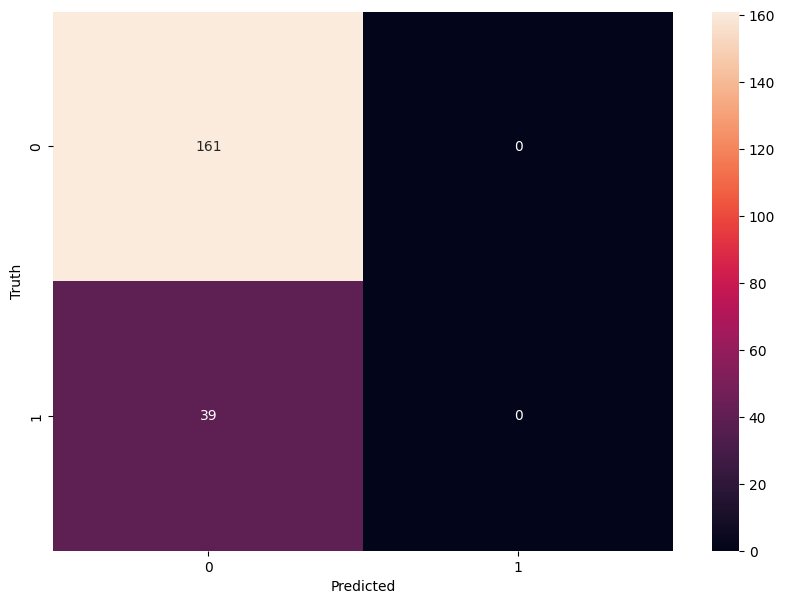

In [98]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

TensorFlow Kears kutubhonasidan foydalangan holdaham model bashoratimiz quvonarli chiqmadi model aniqligi 81% lekin obunachilarni bashorat qilganda obunadan chiqganlarni deyarli barchasini hato bashorat qilgan.

# Hulosa

Demak hulosa qiladigan bo'lsak, bashorat uchun qurilgan modellarimiz barchasini taxlil qilib chiqdik bashorat qilgan modellar kesimida:

1. LogisticRegression() - 81% aniqlik lekin bashorat qilishdagi hatoliklar ko'p.

2. DecisionTreeClassifier() - 73% aniqlik bashorat qilishda hatolik bor lekin ko'p emas

3. keras.Sequential() - 81% aniqlik lekin bashorat qilishda hatoliklar ko'p

Demak biz ushbu loyihani bashorat qilish uchun DecisionTreeClassifier() modelidan foydalanamiz chunki ushbu model qolgan modellarga qaraganda hatosiz ishlamoqda. Ushbu loyihada modellarimiz past va yaxshi ishlamasligining asosiy sababi ma'lumotlarni bir biriga bolgan Correlyatsiyasi pastligida va ma'lumotlr kamligida. Agar ushbu bashort modellimizni kuchaytirmoqchi bo'lsak bizga Ko'p hususiyatli va ko'proq ma'lumotlar kerak bo'ladi. Ushbu modellarni ishlatishdan oldinham korelyatsiyani ko'tarish uchun ma'lumotlar 0 va 1 balansini tengladim lekin shu holatdaham korrelyatsiya oldingiday past va model aniqligi past chiqaverdi. Va yana ma'lumotlarni barchasini classlarga ajiratib chiqdim korrelatsiyani ko'tarish maqsadida ma'lumotlarni classlarga ya'ni 1 dan 100 gacha bo'lgan qiymatlarni barchasini 0 dan 10 gacha bo'lgan raqamlarga almashtirdim lekin shundaham oldingiday korelyatsiya va model aniqligi past chiqaverdi. Shu sababli men modelni shu hollatda qo'ldirishni ma'qul ko'rdim. Men Yechim sifatida shuni taqdim etaolaman mijozlarning ma'lumotlarini qiymatlarini ko'paytirishni Ya'ni mijozning ma'lumotlarini yig'ayotganda u mijozning ko'proq hususiyatlariga etibor berishga. Bundan tashqari ma'lumotlarniham ko'p yig'ish kerak ma'lumotlarimiz qancha ko'p bo'lsa bizning ML modelimiz yaxshi ishlashni boshlaydi. Hozirgi loyihamizda model yaxshi ishlamasligining asosiy sabablari "Obunaqa qolgan" va "Obunani bekor" qilganlarning ma'lumotlariga bir birinikiga judaham o'xshash misol uchun Obunachi yoshi = 12, obunadagi vaqti = 20, oylik harajati = 10,000 bo'lsa, Obunani bekor qilganlarning ham ma'lumotlari deyarli obunadagi odamniki bilan bir xil shu sababli modelimiz ishlash aniqligi past chiqgan."